In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from ast import literal_eval

In [2]:
df_arg = pd.read_csv("./data/predicted/chequeado_predicted.csv")
df = pd.read_csv("./data/predicted/veracity_predicted.csv")

In [3]:
def split_list(row):
    return pd.Series(row)

In [4]:
def convert_list(df,feature):
  df[feature] = df[feature].apply(literal_eval)
  df[[f'{feature}_false', f'{feature}_true']] = df[feature].apply(split_list)
  return df

In [5]:
def parse_df(df):
  df = convert_list(df,'sentiment_probabilities')
  df = convert_list(df,'veracity_probabilities')
  return df


In [6]:
df_arg = parse_df(df_arg)
df = parse_df(df)

In [7]:
df_total = pd.concat([df,df_arg])

### Distribucion de Sentimientos y Probabilidad

In [8]:
def plot_distribution(label,df,text):
  plt.figure(figsize=(10, 5))
  sns.countplot(x=label, data=df,hue=label,palette=["crimson","skyblue"])
  plt.title(f'Distribución de {text}')
  plt.xlabel(f'{text}')
  plt.ylabel('Número de Noticias')
  plt.show()

#### Dataset Global

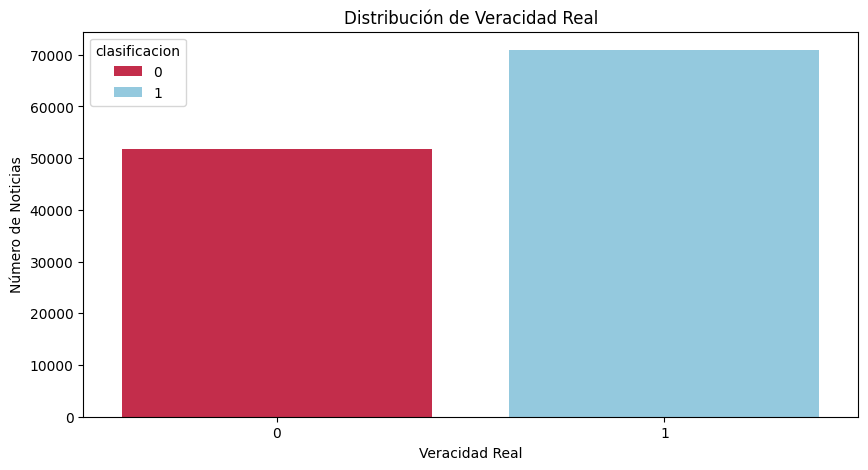

In [9]:
plot_distribution('clasificacion', df,"Veracidad Real")

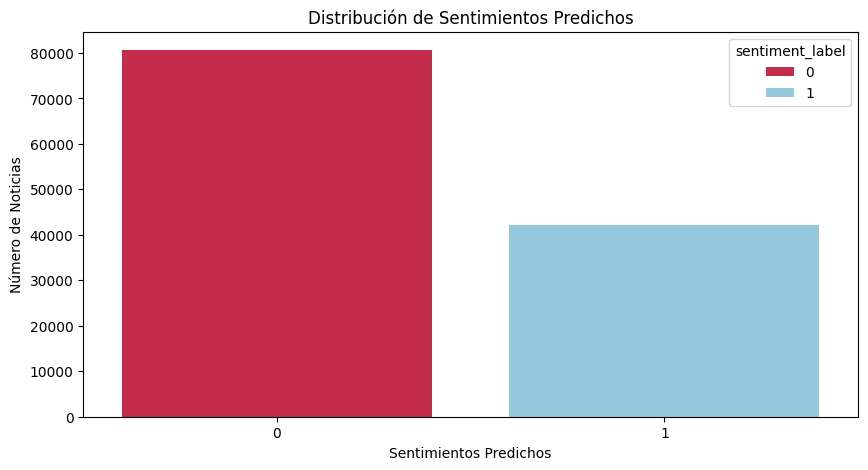

In [10]:
plot_distribution('sentiment_label', df,"Sentimientos Predichos")

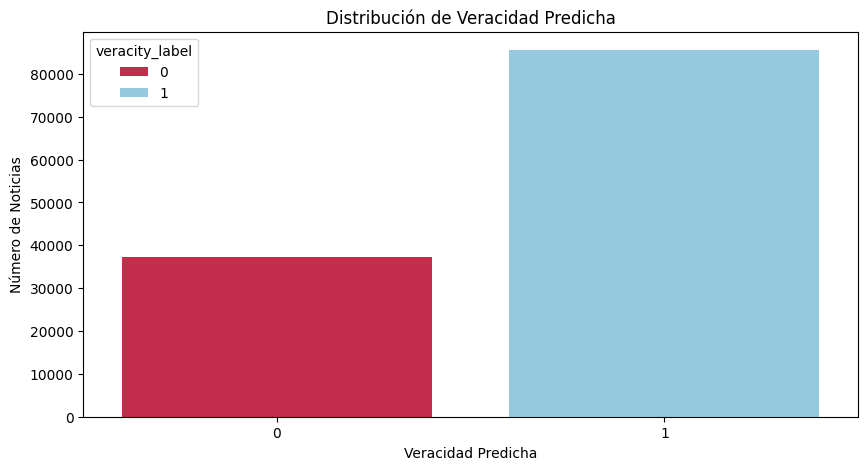

In [11]:
plot_distribution('veracity_label', df,"Veracidad Predicha")

#### Dataset Argentino

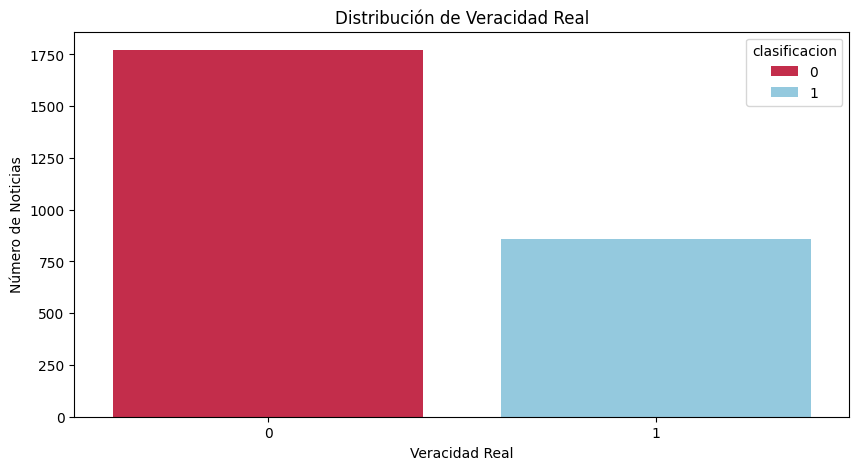

In [12]:
plot_distribution('clasificacion', df_arg,"Veracidad Real")

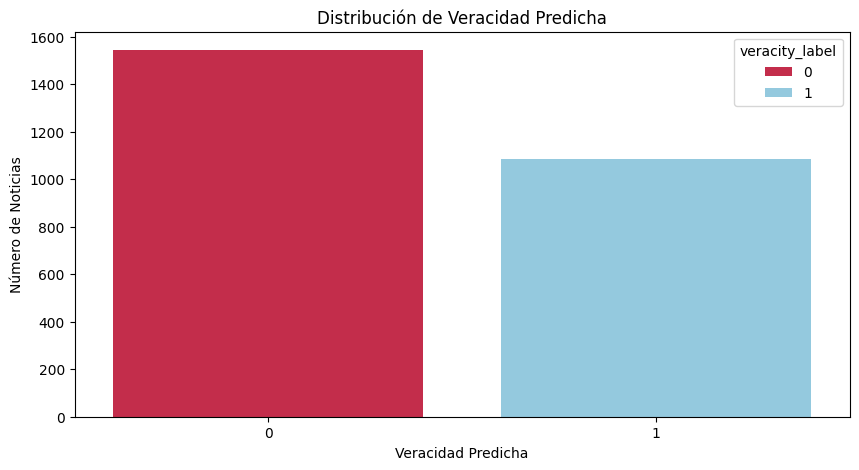

In [13]:
plot_distribution('veracity_label', df_arg,"Veracidad Predicha")

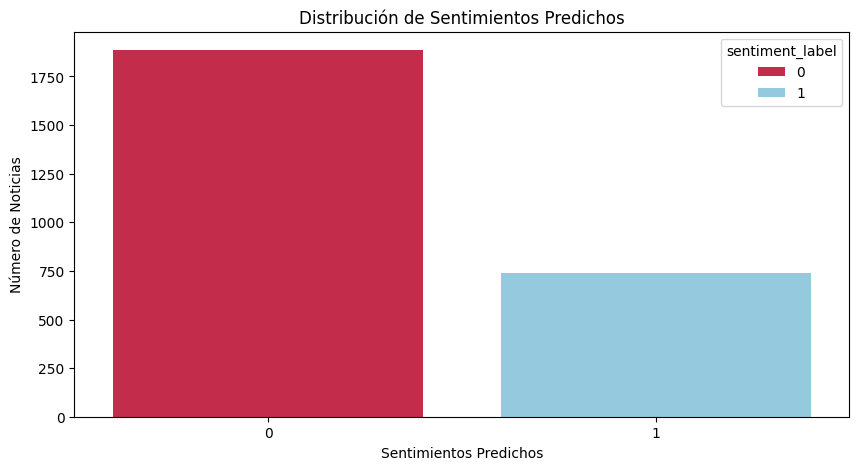

In [14]:
plot_distribution('sentiment_label', df_arg,"Sentimientos Predichos")

### Matriz de Confusion

In [15]:
def plot_confusion_matrix(df_1,df_2,text):
  conf_matrix_veracity = confusion_matrix(df_1, df_2)

  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix_veracity, annot=True, fmt='d', cmap='Blues')
  plt.title(f'Matriz de Confusión para {text}')
  plt.xlabel(f'{text}')
  plt.ylabel('Veracidad Real')
  plt.show()


#### Dataset Global

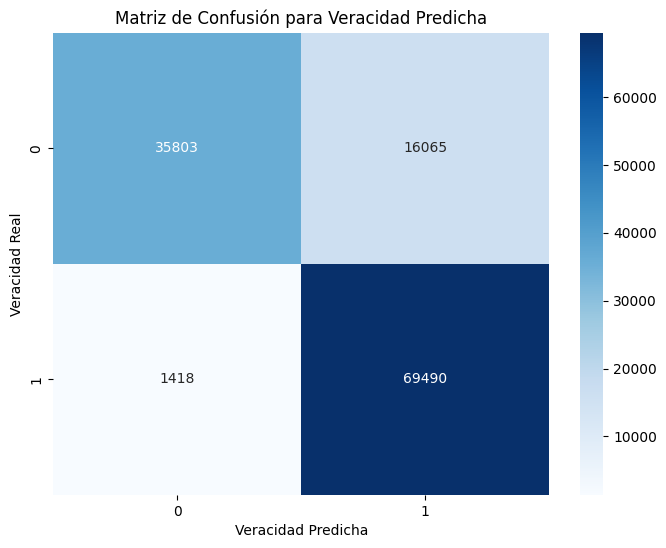

In [16]:
plot_confusion_matrix(df['clasificacion'],df['veracity_label'],'Veracidad Predicha')

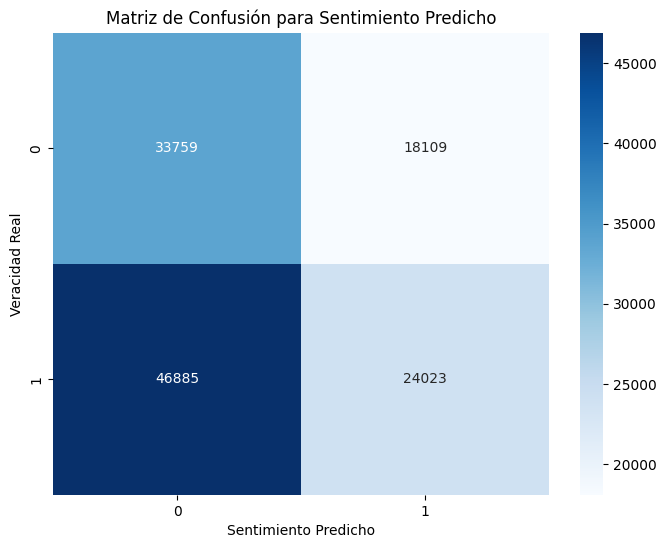

In [17]:
plot_confusion_matrix(df['clasificacion'],df['sentiment_label'],'Sentimiento Predicho')

#### Dataset Argentino

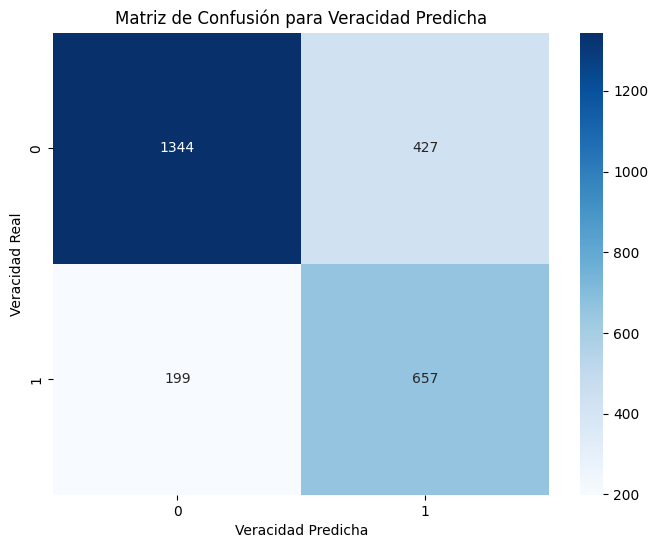

In [18]:
plot_confusion_matrix(df_arg['clasificacion'],df_arg['veracity_label'],'Veracidad Predicha')

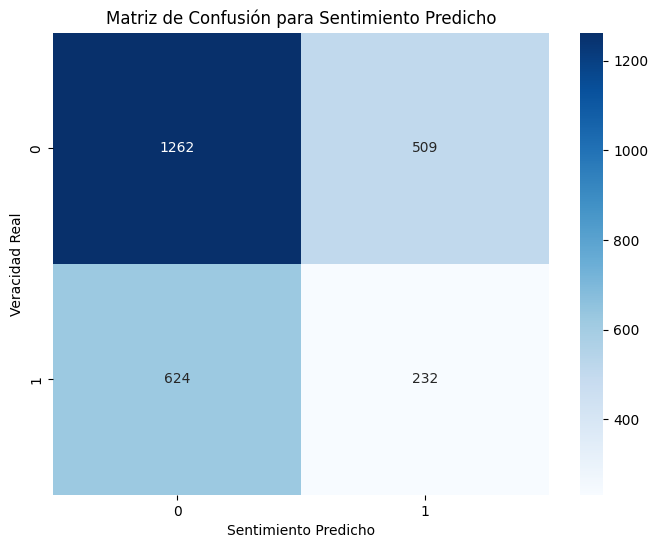

In [19]:
plot_confusion_matrix(df_arg['clasificacion'],df_arg['sentiment_label'],'Sentimiento Predicho')

## Analisis de Correlacion

In [20]:
def plot_correlation():
  return


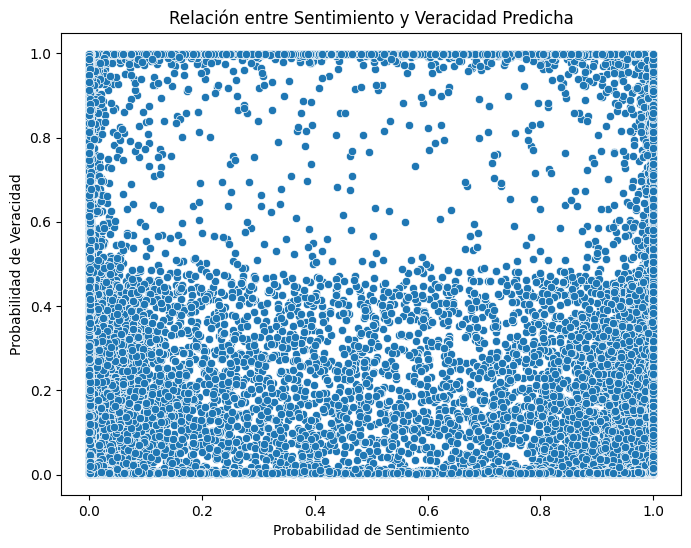

In [21]:
# Gráfico de dispersión entre Sentimiento y Veracidad Predicha
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sentiment_probabilities_false', y='veracity_probabilities_false', data=df)
plt.title('Relación entre Sentimiento y Veracidad Predicha')
plt.xlabel('Probabilidad de Sentimiento')
plt.ylabel('Probabilidad de Veracidad')
plt.show()

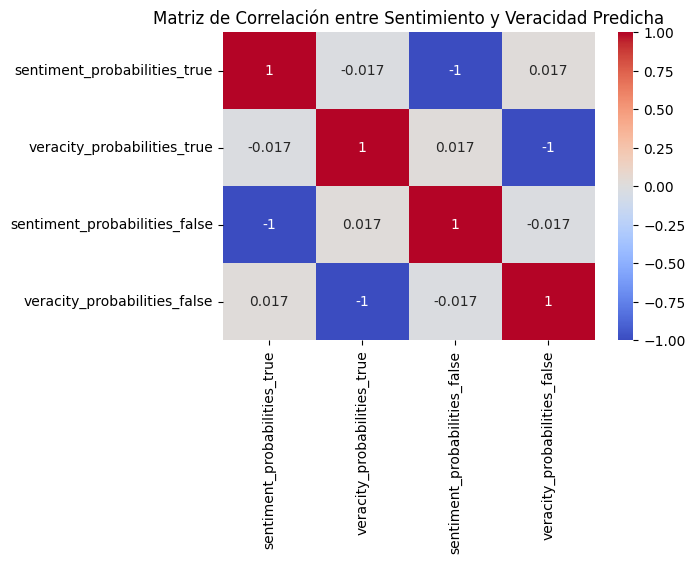

In [22]:
# Matriz de correlación entre Sentimiento y Veracidad Predicha
correlation_matrix = df[['sentiment_probabilities_true', 'veracity_probabilities_true','sentiment_probabilities_false','veracity_probabilities_false']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Sentimiento y Veracidad Predicha')
plt.show()

### Metricas

In [23]:
def calculate_metrics(target,predicted):
  accuracy = accuracy_score(target,predicted)
  precision = precision_score(target,predicted)
  recall = recall_score(target,predicted)
  f1 = f1_score(target,predicted)
  return accuracy,precision,recall,f1

#### Dataset Global

In [24]:
accuracy,precision,recall,f1 = calculate_metrics(df['clasificacion'], df['veracity_label'])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.857602463022089
Precision: 0.8122260534159312
Recall: 0.980002256444971
F1-score: 0.8882611224378927


#### Dataset Argentina

In [25]:
accuracy,precision,recall,f1 = calculate_metrics(df_arg['clasificacion'], df_arg['veracity_label'])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7617053673391702
Precision: 0.6060885608856088
Recall: 0.7675233644859814
F1-score: 0.677319587628866


#### Dataset Total


In [26]:
accuracy,precision,recall,f1 = calculate_metrics(df_total['clasificacion'], df_total['veracity_label'])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.855593566342113
Precision: 0.8096469257493738
Recall: 0.9774678111587983
F1-score: 0.8856776702461443


## Modelado

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
print(df.dtypes)


clasificacion                      int64
texto                             object
sentiment_label                    int64
sentiment_probabilities           object
veracity_label                     int64
veracity_probabilities            object
sentiment_probabilities_false    float64
sentiment_probabilities_true     float64
veracity_probabilities_false     float64
veracity_probabilities_true      float64
dtype: object


In [ ]:
def split_dataset(df):
  X = df.drop(columns=['texto', 'clasificacion','sentiment_probabilities','veracity_probabilities'])
  y = df['clasificacion']

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
  return X_train,y_train,X_val,y_val,X_test,y_test


In [ ]:
def join_dataset(df1,df2):
    return pd.concat([df1,df2])

In [ ]:
X_train,y_train,X_val,y_val,X_test,y_test = split_dataset(df)
X_train_arg,y_train_arg,X_val_arg,y_val_arg,X_test_arg,y_test_arg = split_dataset(df_arg)

In [ ]:
X_train_total = join_dataset(X_train,X_train_arg)
y_train_total = join_dataset(y_train,y_train_arg)

X_val_total = join_dataset(X_val,X_val_arg)
y_val_total = join_dataset(y_val,y_val_arg)

X_test_total = join_dataset(X_test,X_test_arg)
y_test_total = join_dataset(y_test,y_test_arg)

In [ ]:
X_train_total

,sentiment_label,veracity_label,sentiment_probabilities_false,sentiment_probabilities_true,veracity_probabilities_false,veracity_probabilities_true
46350,0,1,0.999944,0.000056,0.275400,0.724600
37474,0,0,0.999953,0.000047,0.998939,0.001061
86551,0,1,0.999901,0.000099,0.279638,0.720362
76595,1,1,0.003416,0.996584,0.003494,0.996506
21035,0,0,0.998761,0.001239,0.998995,0.001005
...,...,...,...,...,...,...
264,0,0,0.999947,0.000053,0.916958,0.083042
1739,0,0,0.999877,0.000123,0.842591,0.157409
88,0,0,0.999362,0.000638,0.688785,0.311215
484,1,1,0.012661,0.987339,0.474193,0.525807


In [ ]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [ ]:
history = model.fit(X_train_total, y_train_total, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
2508/2508 [==============================] - 6s 2ms/step - loss: 0.3270 - accuracy: 0.8514 - val_loss: 0.2826 - val_accuracy: 0.8689
Epoch 2/10
2508/2508 [==============================] - 5s 2ms/step - loss: 0.3031 - accuracy: 0.8568 - val_loss: 0.2770 - val_accuracy: 0.8693
Epoch 3/10
2508/2508 [==============================] - 5s 2ms/step - loss: 0.2934 - accuracy: 0.8570 - val_loss: 0.2723 - val_accuracy: 0.8691
Epoch 4/10
2508/2508 [==============================] - 6s 2ms/step - loss: 0.2873 - accuracy: 0.8593 - val_loss: 0.2706 - val_accuracy: 0.8666
Epoch 5/10
2508/2508 [==============================] - 5s 2ms/step - loss: 0.2849 - accuracy: 0.8597 - val_loss: 0.2701 - val_accuracy: 0.8666
Epoch 6/10
2508/2508 [==============================] - 6s 3ms/step - loss: 0.2843 - accuracy: 0.8596 - val_loss: 0.2692 - val_accuracy: 0.8684
Epoch 7/10
2508/2508 [==============================] - 5s 2ms/step - loss: 0.2839 - accuracy: 0.8601 - val_loss: 0.2690 - val_accuracy:

In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

768/768 [==============================] - 1s 1ms/step


In [ ]:
accuracy,precision,recall,f1 = calculate_metrics(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.8344192865287506
Precision: 0.8011119081779053
Recall: 0.9477369165487978
F1-score: 0.8682778281715694


In [ ]:
best_accuracy_model = None
best_f1_model = None
best_accuracy = 0
best_f1= 0

for num_layers in [1, 2, 3]:
    for num_neurons in [32, 64, 128]:
        print(f"Model - num layers: {num_layers}, num_neurons: {num_neurons}")
        model = Sequential()
        for _ in range(num_layers):
            model.add(Dense(num_neurons, activation='relu'))
        model.add(Dense(1, activation='sigmoid'))

        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

        y_pred_prob = model.predict(X_test)
        y_pred = (y_pred_prob > 0.5).astype(int)

        accuracy,precision,recall,f1 = calculate_metrics(y_test, y_pred)

        print("Accuracy:", accuracy)
        print("Precision:", precision)
        print("Recall:", recall)
        print("F1-score:", f1)

        if accuracy > best_accuracy:
          best_accuracy_model =f"Model - num layers: {num_layers}, num_neurons: {num_neurons}"
          best_accuracy = accuracy

        if f1 > best_f1:
          best_f1_model = f"Model - num layers: {num_layers}, num_neurons: {num_neurons}"
          best_f1 = f1
        print("----------------------------------")

Model - num layers: 1, num_neurons: 32
Epoch 1/10
2456/2456 [==============================] - 6s 2ms/step - loss: 0.3191 - accuracy: 0.8505 - val_loss: 0.2784 - val_accuracy: 0.8692
Epoch 2/10
2456/2456 [==============================] - 6s 2ms/step - loss: 0.2857 - accuracy: 0.8600 - val_loss: 0.2765 - val_accuracy: 0.8693
Epoch 3/10
2456/2456 [==============================] - 5s 2ms/step - loss: 0.2848 - accuracy: 0.8587 - val_loss: 0.2760 - val_accuracy: 0.8649
Epoch 4/10
2456/2456 [==============================] - 6s 2ms/step - loss: 0.2847 - accuracy: 0.8592 - val_loss: 0.2753 - val_accuracy: 0.8667
Epoch 5/10
2456/2456 [==============================] - 5s 2ms/step - loss: 0.2846 - accuracy: 0.8589 - val_loss: 0.2757 - val_accuracy: 0.8653
Epoch 6/10
2456/2456 [==============================] - 5s 2ms/step - loss: 0.2846 - accuracy: 0.8589 - val_loss: 0.2756 - val_accuracy: 0.8692
Epoch 7/10
2456/2456 [==============================] - 6s 2ms/step - loss: 0.2843 - accuracy: 0.

In [ ]:
print(f"Best accuracy {best_accuracy_model}")
print(f"Best f1 {best_f1_model}")

Best accuracy Model - num layers: 1, num_neurons: 128
Best f1 Model - num layers: 1, num_neurons: 128
